# Phân tích dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/GGDrive/')

Drive already mounted at /content/GGDrive/; to attempt to forcibly remount, call drive.mount("/content/GGDrive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import math
import warnings
warnings.filterwarnings("ignore")
import string
import nltk
from nltk.corpus import stopwords

## Bước 1: Chuẩn bị dữ liệu

In [ ]:
df=pd.read_csv('/content/GGDrive/MyDrive/Phân Tích Dữ Liệu/Project/Data/Tweets.csv')
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


## Bước 2: Xử lý dữ liệu

In [ ]:
# Kiểm tra các giá trị thiếu trong các cột
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
# Hiển thị các cột của dataframe
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
# Hiển thị thông tin của bộ dữu liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
# Hiển thị DataFrame sau khi đã xóa các cột không cần thiết
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


## Bước 3: Làm sạch dữ liệu

### Bước 3.1 : Xử lý chuỗi (symbol, stopword, punctuations)

In [ ]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

In [ ]:
df['airline']=df['airline'].apply(lambda x: x.split(',,,')[0])

In [ ]:
# Loại bỏ tên các hãng bay khỏi các bình luận trong cột 'text'
def remove_airline_names_from_text(row):
    airline_name = row['airline'].lower().replace(" ", "")
    text = row['text'].lower()
    text = text.replace("@" + airline_name, "")  # Loại bỏ tên hãng bay
    return text

# Áp dụng hàm loại bỏ tên hãng bay cho cột 'text' trong DataFrame
df['text'] = df.apply(remove_airline_names_from_text, axis=1)

In [ ]:
for index,text in enumerate(df['text'][35:40]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
 nice rt : vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
Comment 2:
  moodlighting is the only way to fly! best experience ever! cool and calming. 💜✈ #moodlitmonday
Comment 3:
  @freddieawards done and done! best airline around, hands down!
Comment 4:
  when can i book my flight to hawaii??
Comment 5:
  your chat support is not working on your site: http://t.co/vhp2gtdwpk


In [ ]:
# Tải danh sách stopwords của tiếng Anh từ thư viện nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Hàm xử lý chuỗi: loại bỏ dấu câu, stopwords và chuyển về chữ thường
def clean_text(text):
    # Loại bỏ dấu câu
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Chuyển về chữ thường
    text = text.lower()
    # Loại bỏ stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [ ]:
# Áp dụng hàm xử lý chuỗi vào cột 'text' của DataFrame
df['clean_text'] = df['text'].apply(clean_text)

In [ ]:
# Hiển thị 10 dòng đầu của DataFrame sau khi đã xử lý chuỗi
print(df['clean_text'].head(20))

0                                         dhepburn said
1         plus youve added commercials experience tacky
2          didnt today must mean need take another trip
3     really aggressive blast obnoxious entertainmen...
4                                  really big bad thing
5     seriously would pay 30 flight seats didnt play...
6     yes nearly every time fly vx “ear worm” won’t ...
7     really missed prime opportunity men without ha...
8                                        well didnt…but
9                 amazing arrived hour early youre good
10    know suicide second leading cause death among ...
11    lt3 pretty graphics much better minimal iconog...
12    great deal already thinking 2nd trip australia...
13    virginmedia im flying fabulous seductive skies...
14                                               thanks
15                            sfopdx schedule still mia
16    excited first cross country flight lax mco ive...
17    flew nyc sfo last week couldnt fully sit s

In [ ]:
df['text']=df['text'].apply(lambda x: x.split(',,,')[0])

In [ ]:
for index,text in enumerate(df['text'][35:40]):
  print('Review %d:\n'%(index+1),text)

Review 1:
 nice rt : vibe with the moodlight from takeoff to touchdown. #moodlitmonday #sciencebehindtheexperience http://t.co/y7o0unxtqp
Review 2:
  moodlighting is the only way to fly! best experience ever! cool and calming. 💜✈ #moodlitmonday
Review 3:
  @freddieawards done and done! best airline around, hands down!
Review 4:
  when can i book my flight to hawaii??
Review 5:
  your chat support is not working on your site: http://t.co/vhp2gtdwpk


### Bước 3.2 : Xử lý các dạng từ. (Expand contractions, Lowercase the reviews, Remove digits and words containing digits, Remove punctuations)

In [ ]:
# Chuyển các từ viết tắt thành các từ đầy đủ

# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['text']=df['text'].apply(lambda x:expand_contractions(x))

**Lowercase the reviews**

In [ ]:
# Chuyển các từ in hoa thành chữ thường
df['clean_text']=df['text'].apply(lambda x: x.lower())

**Remove digits and words containing digits**

In [ ]:
# Loại bỏ chữ số và từ có chứa chữ số
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('\w*\d\w*','', x))

**Remove Punctuations**

In [ ]:
# Loại bỏ tất cả các dấu câu
df['clean_text']=df['clean_text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
# Loại bỏ tất cả các khoảng trống dư thừa
df['clean_text']=df['clean_text'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
import re

# Tạo biểu thức chính quy để tìm icon Unicode
icon_regex = r'[\U00010000-\U0010FFFF]'

# Hàm để lọc ra tất cả các icon Unicode từ một chuỗi
def find_icons(text):
    return re.findall(icon_regex, text)

# Áp dụng hàm cho cột 'cleaned' trong DataFrame
df['icons'] = df['clean_text'].apply(find_icons)

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,icons
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what dhepburn said,[]
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you have added commercials to the experi...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you have added commercials to the experi...,[]
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i did not today... must mean i need to take a...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),i did not today must mean i need to take anot...,[]
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it is really aggressive to blast obnoxious ""e...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),it is really aggressive to blast obnoxious en...,[]
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it is a really big bad thing about it,[]


In [ ]:
# Hàm để loại bỏ các icon Unicode từ một chuỗi
def remove_icons(text):
    return re.sub(icon_regex, '', text)

# Áp dụng hàm loại bỏ icon cho cột 'cleaned' trong DataFrame
df['clean_text'] = df['clean_text'].apply(remove_icons)

In [ ]:
for index,text in enumerate(df['clean_text'][45:60]):
  print('Comment %d:\n'%(index+1),text)

Comment 1:
  im elevategold for a good reason you rock
Comment 2:
  dream httptco httptco
Comment 3:
  wow this just blew my mind
Comment 4:
  ladygaga carrieunderwood after last night tribute soundofmusic ladygaga i think carrieunderwood agree
Comment 5:
  ladygaga carrieunderwood all were entertaining
Comment 6:
  is flight on it is way was supposed to take off minutes ago website still shows on time not in flight thanks
Comment 7:
  ladygaga carrieunderwood julie andrews all the way though ladygaga was very impressive no to carrieunderwood
Comment 8:
  wish you flew out of atlanta soon
Comment 9:
  ladygaga carrieunderwood julie andrews hands down
Comment 10:
  will flights be leaving dallas for la on february 
Comment 11:
  hi im so excited about your lgagtdal deal but ive been trying book since last week amp the page never loads thx
Comment 12:
  you know it need it on my spotify stat guiltypleasures
Comment 13:
  ladygaga carrieunderwood im lady gaga she is amazing 
Comment 14:
 

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,clean_text,icons
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,what @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),what dhepburn said,[]
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you have added commercials to the experi...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),plus you have added commercials to the experi...,[]
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,i did not today... must mean i need to take a...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),i did not today must mean i need to take anot...,[]
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it is really aggressive to blast obnoxious ""e...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),it is really aggressive to blast obnoxious en...,[]
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it is a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),and it is a really big bad thing about it,[]


## Bước 4: Xử lý stopword và lemmatization (Document Term Matrix)

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Download stopwords và wordnet từ nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Khởi tạo WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
# Khởi tạo CountVectorizer để tạo Document Term Matrix
vectorizer = CountVectorizer()

In [ ]:
# Xây dựng stopword list
stop_words = set(stopwords.words('english'))

In [ ]:
# Hàm xử lý văn bản: loại bỏ stopword và lemmatization
def process_text(text):
    # Tách từ
    tokens = word_tokenize(text)
    # Loại bỏ stopword và lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]
    return ' '.join(tokens)

In [ ]:
# Áp dụng hàm xử lý văn bản cho trường cleaned
df['cleaned'] = df['clean_text'].apply(process_text)

In [ ]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['clean_text'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [ ]:
df_grouped=df[['airline','lemmatized']].groupby(by='airline').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
airline,
American,air consider continue point program receive pe...
Delta,jetblue yesterday way ewr fll takeoff \n wheel...
Southwest,air wait hit hour air m happy cancel flight fl...
US Airways,well time flight friday need change worried ...
United,thank thank take care mr happy customer ...


In [ ]:
df_cleaned = df.copy()

In [ ]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names_out())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aaaand,aaadvantage,aaalwayslate,aaba,aacom,aacustomerservice,aadavantage,aadelay,aadfw,...,zipper,zkatcher,zombie,zone,zoom,zrh,zrhairport,zuke,zurich,zurichnew
airline,,,,,,,,,,,,,,,,,,,,,
American,167,0,1,1,0,1,1,1,1,2,...,0,0,0,2,1,0,0,0,1,1
Delta,3,0,0,0,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
Southwest,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


## Bước 5: Khám phá dữ liệu

### 1. Mỗi hãng máy bay nhận được bao nhiêu số lượng bình luận?

In [ ]:
# Đếm số lượng bình luận cho mỗi hãng máy bay
comment_counts = df['airline'].value_counts()

# Hiển thị kết quả
print("Mỗi hãng máy bay nhận được số lượng bình luận như sau:")
print(comment_counts)

Mỗi hãng máy bay nhận được số lượng bình luận như sau:
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


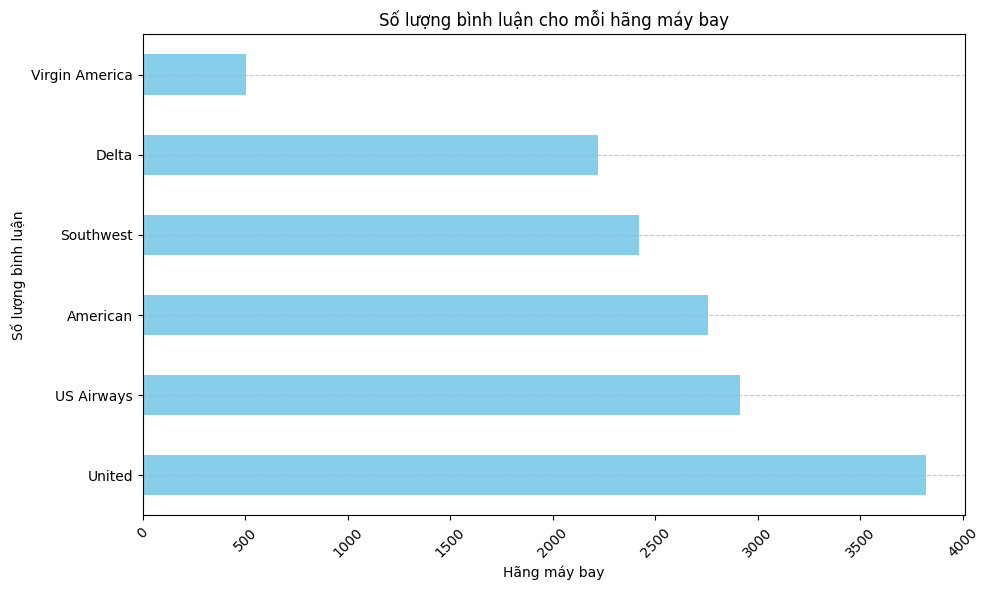

In [ ]:
import matplotlib.pyplot as plt

# Đếm số lượng bình luận cho mỗi hãng máy bay
comment_counts = df['airline'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
comment_counts.plot(kind='barh', color='skyblue')
plt.title('Số lượng bình luận cho mỗi hãng máy bay')
plt.xlabel('Hãng máy bay')
plt.ylabel('Số lượng bình luận')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2. Hãng hàng không nào nhận được nhiều phản hồi tiêu cực nhất trên Twitter?

In [ ]:
# Tính số lượng phản hồi tiêu cực cho mỗi hãng hàng không
negative_counts = df[df['airline_sentiment'] == 'negative']['airline'].value_counts()

# In số lượng phản hồi tiêu cực cho từng hãng hàng không
print("Số lượng phản hồi tiêu cực cho từng hãng hàng không:")
print(negative_counts)

Số lượng phản hồi tiêu cực cho từng hãng hàng không:
United            2633
US Airways        2263
American          1960
Southwest         1186
Delta              955
Virgin America     181
Name: airline, dtype: int64


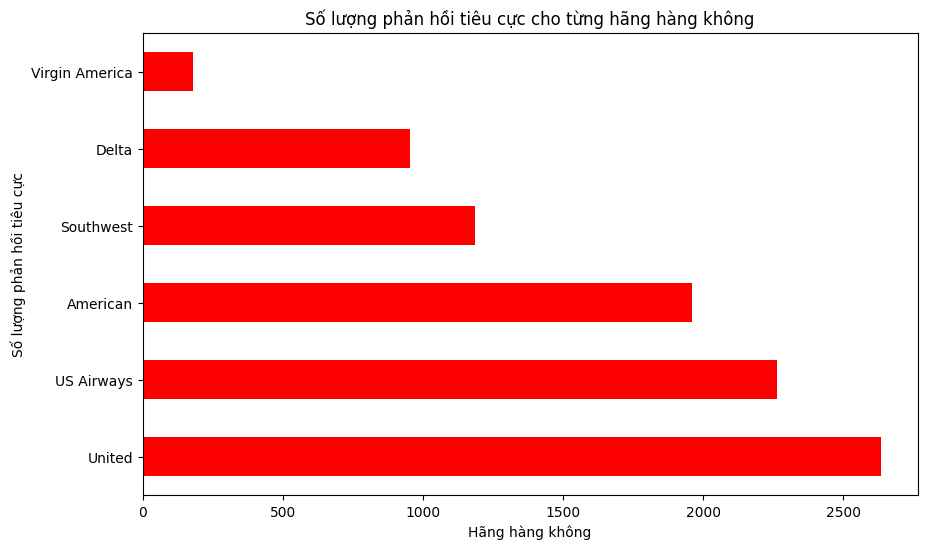

In [ ]:
# Định dạng biểu đồ
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cột
negative_counts.plot(kind='barh', color='red')

# Đặt tiêu đề và nhãn trục
plt.title('Số lượng phản hồi tiêu cực cho từng hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Số lượng phản hồi tiêu cực')

# Hiển thị biểu đồ
plt.show()

### 3. Lý do phổ biến nhất gây ra cảm xúc tiêu cực trong các tweet về các hãng hàng không là gì?


In [ ]:
# Đếm số lần xuất hiện của mỗi lý do tiêu cực
negative_reason_counts = df['negativereason'].value_counts()

# In số lần xuất hiện của mỗi lý do
print("Số lượng xuất hiện của mỗi lý do tiêu cực trong các tweet về các hãng hàng không:")
print(negative_reason_counts)


Số lượng xuất hiện của mỗi lý do tiêu cực trong các tweet về các hãng hàng không:
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


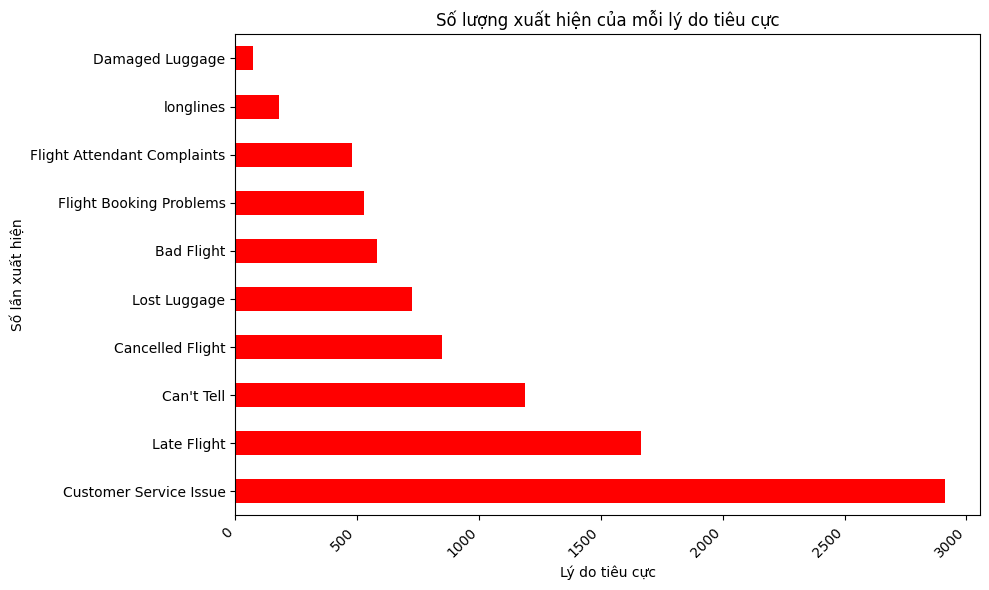

In [ ]:
# Đếm số lần xuất hiện của mỗi lý do tiêu cực
negative_reason_counts = df['negativereason'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
negative_reason_counts.plot(kind='barh', color='red')
plt.title('Số lượng xuất hiện của mỗi lý do tiêu cực')
plt.xlabel('Lý do tiêu cực')
plt.ylabel('Số lần xuất hiện')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. Sự khác biệt về độ tin cậy của lý do gây ra cảm xúc tiêu cực giữa các hãng hàng không là như thế nào?

In [ ]:
# Tính độ tin cậy trung bình của mỗi lý do tiêu cực cho từng hãng hàng không
avg_confidence_by_airline = df_cleaned.groupby(['airline', 'negativereason'])['airline_sentiment_confidence'].mean()

# Hiển thị kết quả
print("Độ tin cậy trung bình của mỗi lý do tiêu cực cho từng hãng hàng không:")
print(avg_confidence_by_airline)

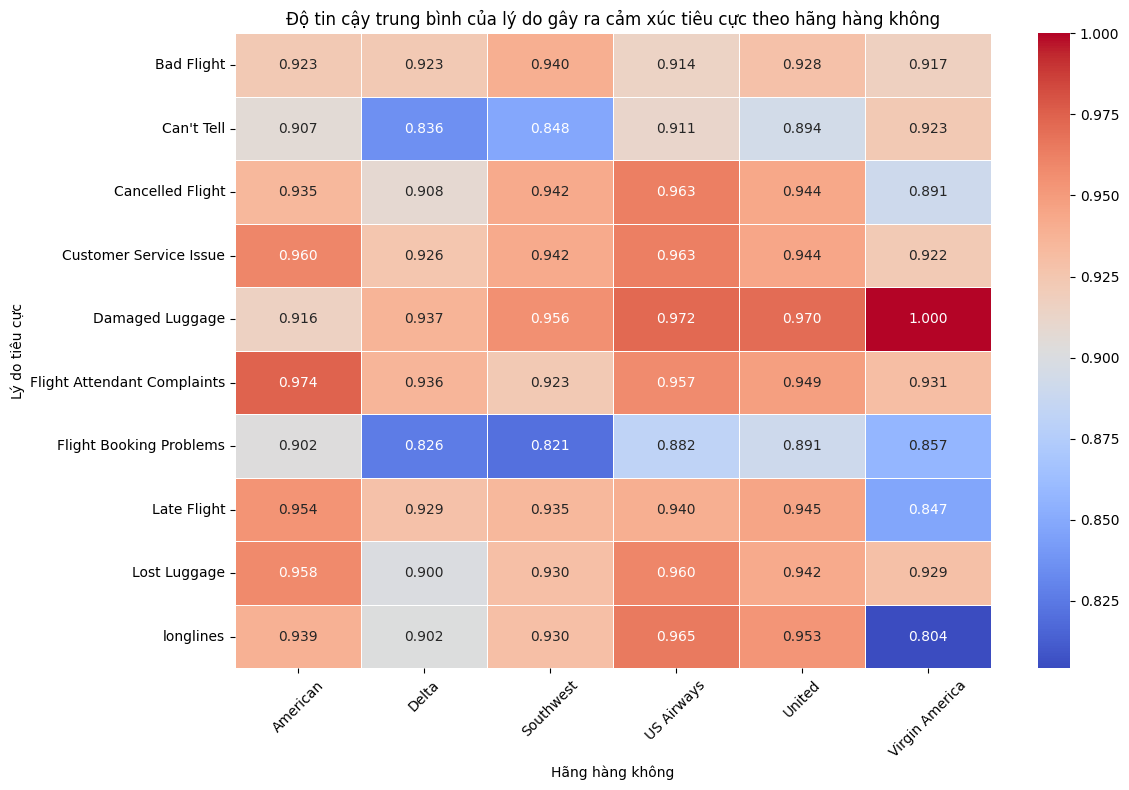

In [ ]:
# Chuyển dữ liệu từ multi-index Series sang DataFrame và chuyển vị
avg_confidence_by_airline_df_transposed = avg_confidence_by_airline_df.transpose()

# Vẽ biểu đồ heatmap với cột x và y đã được hoán đổi
plt.figure(figsize=(12, 8))
sns.heatmap(avg_confidence_by_airline_df_transposed, cmap='coolwarm', annot=True, fmt=".3f", linewidths=.5)
plt.title('Độ tin cậy trung bình của lý do gây ra cảm xúc tiêu cực theo hãng hàng không')
plt.xlabel('Hãng hàng không')
plt.ylabel('Lý do tiêu cực')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Tần suất xuất hiện của các từ khóa phổ biến như "delay" (trễ chuyến), "customer service" (dịch vụ khách hàng) giữa các hãng bay là bao nhiêu?

In [ ]:
# Tạo danh sách các hãng hàng không từ dữ liệu
airlines = df['airline'].unique()

# Từ khóa cần kiểm tra
keywords = ["delay", "customer service"]

# Tạo một từ điển để lưu trữ số lần xuất hiện của mỗi từ khóa cho từng hãng hàng không
keyword_counts = {}

# Lặp qua từng hãng hàng không
for airline in airlines:
    # Đếm số lần xuất hiện của mỗi từ khóa trong các tweet của hãng hàng không hiện tại
    delay_count = df[df['airline'] == airline]['text'].str.contains('delay', case=False).sum()
    service_count = df[df['airline'] == airline]['text'].str.contains('customer service', case=False).sum()

    # Lưu số lần xuất hiện vào từ điển
    keyword_counts[airline] = {"delay": delay_count, "customer_service": service_count}

# Hiển thị kết quả
print("Tần suất xuất hiện của các từ khóa phổ biến giữa các hãng hàng không:")
for airline, counts in keyword_counts.items():
    print(f"{airline}:")
    print(f"  - Số lần xuất hiện của 'delay': {counts['delay']}")
    print(f"  - Số lần xuất hiện của 'customer service': {counts['customer_service']}")

Tần suất xuất hiện của các từ khóa phổ biến giữa các hãng hàng không:
Virgin America:
  - Số lần xuất hiện của 'delay': 11
  - Số lần xuất hiện của 'customer service': 10
United:
  - Số lần xuất hiện của 'delay': 326
  - Số lần xuất hiện của 'customer service': 158
Southwest:
  - Số lần xuất hiện của 'delay': 102
  - Số lần xuất hiện của 'customer service': 92
Delta:
  - Số lần xuất hiện của 'delay': 165
  - Số lần xuất hiện của 'customer service': 44
US Airways:
  - Số lần xuất hiện của 'delay': 227
  - Số lần xuất hiện của 'customer service': 149
American:
  - Số lần xuất hiện của 'delay': 129
  - Số lần xuất hiện của 'customer service': 110


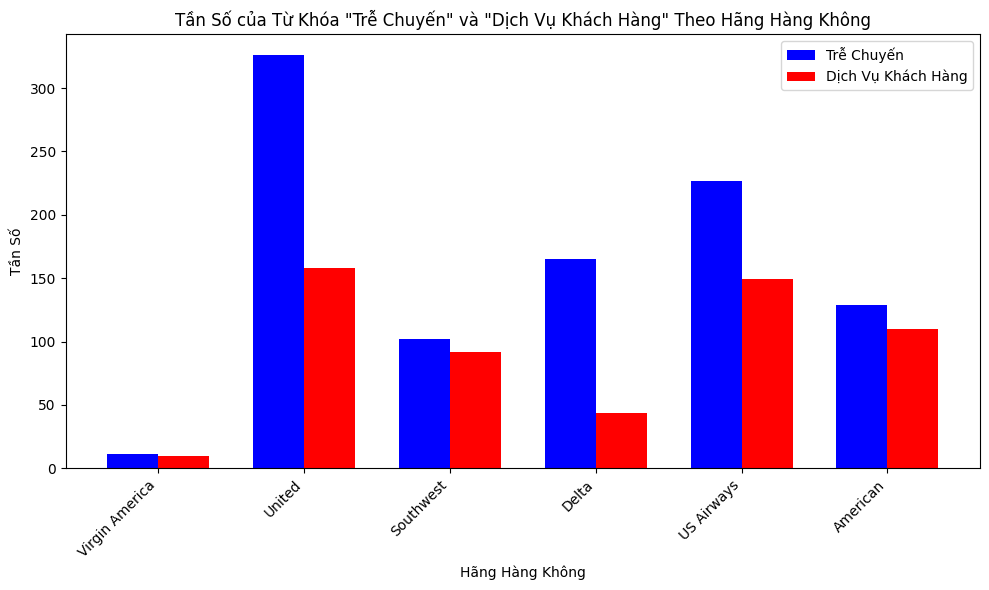

In [ ]:
# Tạo danh sách các hãng hàng không và số lần xuất hiện của từ khóa "delay" và "customer service"
airlines = list(keyword_counts.keys())
delay_counts = [keyword_counts[airline]["delay"] for airline in airlines]
service_counts = [keyword_counts[airline]["customer_service"] for airline in airlines]

# Đặt độ rộng của mỗi cột và vị trí của các nhãn
bar_width = 0.35
index = np.arange(len(airlines))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(index, delay_counts, bar_width, color='b', label='Trễ Chuyến')
plt.bar(index + bar_width, service_counts, bar_width, color='r', label='Dịch Vụ Khách Hàng')

# Đặt nhãn cho trục và tiêu đề
plt.xlabel('Hãng Hàng Không')
plt.ylabel('Tần Số')
plt.title('Tần Số của Từ Khóa "Trễ Chuyến" và "Dịch Vụ Khách Hàng" Theo Hãng Hàng Không')
plt.xticks(index + bar_width / 2, airlines, rotation=45, ha='right')
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 6. Tần suất xuất hiện của các từ khóa phổ biến như "thank", "good", "great" giữa các hãng bay là bao nhiêu?

In [ ]:
# Từ khóa cần phân tích
keywords = ["thank", "good", "great"]

# Tạo một từ điển để lưu trữ số lần xuất hiện của từng từ khóa cho từng hãng hàng không
keyword_counts = {}

# Lặp qua từng hãng hàng không
for airline in df['airline'].unique():
    # Tạo một từ điển để lưu trữ số lần xuất hiện của từng từ khóa cho hãng hàng không hiện tại
    keyword_counts[airline] = {}
    # Lặp qua từng từ khóa
    for keyword in keywords:
        # Đếm số lần xuất hiện của từ khóa trong các tweet của hãng hàng không hiện tại
        count = df[(df['airline'] == airline) & (df['text'].str.contains(keyword, case=False))].shape[0]
        # Lưu số lần xuất hiện vào từ điển
        keyword_counts[airline][keyword] = count

# Hiển thị kết quả
for airline, counts in keyword_counts.items():
    print(f"{airline}:")
    for keyword, count in counts.items():
        print(f"  - Số lần xuất hiện của '{keyword}': {count}")

Virgin America:
  - Số lần xuất hiện của 'thank': 45
  - Số lần xuất hiện của 'good': 10
  - Số lần xuất hiện của 'great': 17
United:
  - Số lần xuất hiện của 'thank': 434
  - Số lần xuất hiện của 'good': 88
  - Số lần xuất hiện của 'great': 68
Southwest:
  - Số lần xuất hiện của 'thank': 331
  - Số lần xuất hiện của 'good': 48
  - Số lần xuất hiện của 'great': 67
Delta:
  - Số lần xuất hiện của 'thank': 282
  - Số lần xuất hiện của 'good': 64
  - Số lần xuất hiện của 'great': 72
US Airways:
  - Số lần xuất hiện của 'thank': 271
  - Số lần xuất hiện của 'good': 60
  - Số lần xuất hiện của 'great': 63
American:
  - Số lần xuất hiện của 'thank': 324
  - Số lần xuất hiện của 'good': 67
  - Số lần xuất hiện của 'great': 49


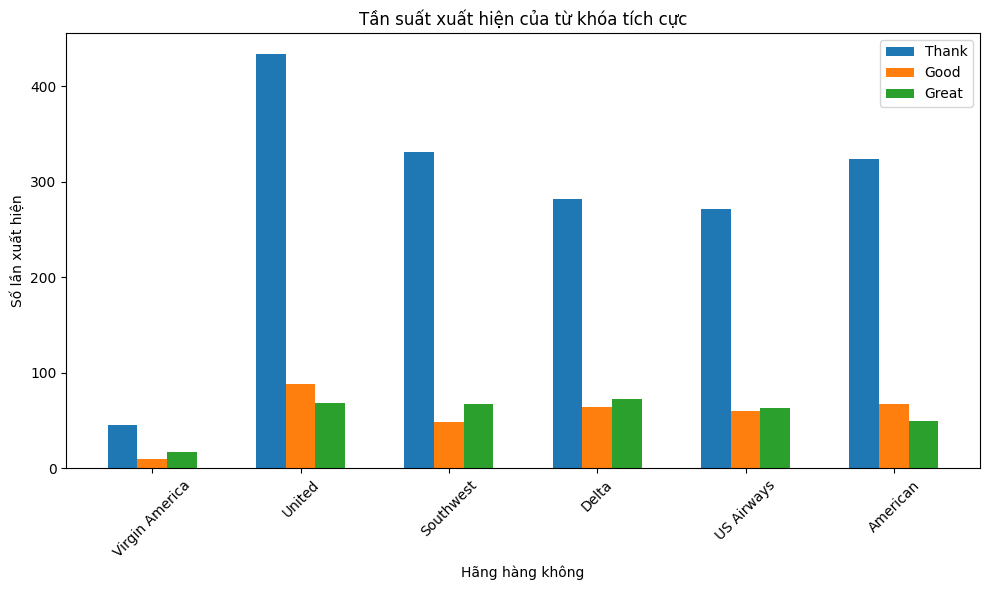

In [ ]:
airlines = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']
thank = [45, 434, 331, 282, 271, 324]
good = [10, 88, 48, 64, 60, 67]
great = [17, 68, 67, 72, 63, 49]

x = range(len(airlines))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

plt.bar(x, thank, width=0.2, label='Thank')
plt.bar([i + 0.2 for i in x], good, width=0.2, label='Good')
plt.bar([i + 0.4 for i in x], great, width=0.2, label='Great')

plt.xlabel('Hãng hàng không')
plt.ylabel('Số lần xuất hiện')
plt.title('Tần suất xuất hiện của từ khóa tích cực')
plt.xticks([i + 0.2 for i in x], airlines, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### 7. Tần suất xuất hiện của các từ khóa phổ biến như "bad", "poor", "terrile" giữa các hãng bay là bao nhiêu?

In [ ]:
# Tạo danh sách các từ khóa
keywords = ['bad', 'poor', 'terrible']

# Tạo dictionary để lưu số lần xuất hiện của mỗi từ khóa cho mỗi hãng hàng không
keyword_counts = {'Virgin America': [0, 0, 0],
                  'United': [0, 0, 0],
                  'Southwest': [0, 0, 0],
                  'Delta': [0, 0, 0],
                  'US Airways': [0, 0, 0],
                  'American': [0, 0, 0]}

# Lặp qua từng tweet trong DataFrame
for index, row in df.iterrows():
    for i, keyword in enumerate(keywords):
        # Kiểm tra xem từ khóa có trong tweet không
        if keyword in row['text'].lower():
            # Tăng số lần xuất hiện của từ khóa cho hãng hàng không tương ứng
            keyword_counts[row['airline']][i] += 1

# Hiển thị kết quả
for airline, counts in keyword_counts.items():
    print(airline + ":")
    for i, keyword in enumerate(keywords):
        print("  - Số lần xuất hiện của '" + keyword + "':", counts[i])

Virgin America:
  - Số lần xuất hiện của 'bad': 5
  - Số lần xuất hiện của 'poor': 1
  - Số lần xuất hiện của 'terrible': 1
United:
  - Số lần xuất hiện của 'bad': 61
  - Số lần xuất hiện của 'poor': 36
  - Số lần xuất hiện của 'terrible': 42
Southwest:
  - Số lần xuất hiện của 'bad': 40
  - Số lần xuất hiện của 'poor': 10
  - Số lần xuất hiện của 'terrible': 14
Delta:
  - Số lần xuất hiện của 'bad': 30
  - Số lần xuất hiện của 'poor': 10
  - Số lần xuất hiện của 'terrible': 6
US Airways:
  - Số lần xuất hiện của 'bad': 55
  - Số lần xuất hiện của 'poor': 30
  - Số lần xuất hiện của 'terrible': 23
American:
  - Số lần xuất hiện của 'bad': 62
  - Số lần xuất hiện của 'poor': 32
  - Số lần xuất hiện của 'terrible': 20


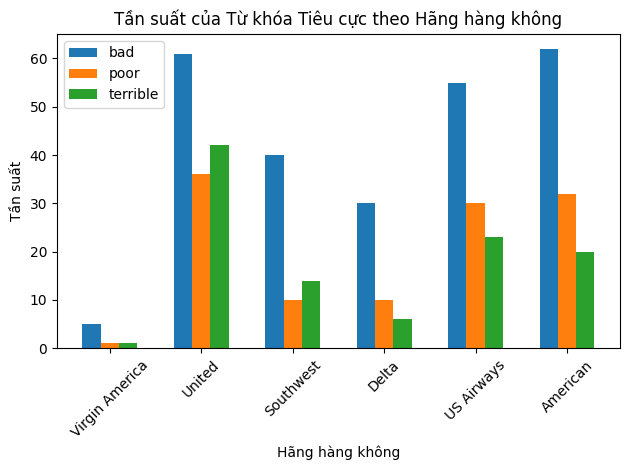

In [ ]:
# Tên các hãng hàng không
hang_hang_khong = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']

# Số lần xuất hiện của từ khóa "bad"
so_lan_bad = [5, 61, 40, 30, 55, 62]

# Số lần xuất hiện của từ khóa "poor"
so_lan_poor = [1, 36, 10, 10, 30, 32]

# Số lần xuất hiện của từ khóa "terrible"
so_lan_terrible = [1, 42, 14, 6, 23, 20]

# Độ rộng của mỗi cột
chieu_rong_cot = 0.2

# Vị trí của các cột trên trục x
index = range(len(hang_hang_khong))

# Vẽ biểu đồ
plt.bar(index, so_lan_bad, chieu_rong_cot, label='bad')
plt.bar([i + chieu_rong_cot for i in index], so_lan_poor, chieu_rong_cot, label='poor')
plt.bar([i + 2 * chieu_rong_cot for i in index], so_lan_terrible, chieu_rong_cot, label='terrible')

# Đặt nhãn cho trục x và y
plt.xlabel('Hãng hàng không')
plt.ylabel('Tần suất')

# Đặt tiêu đề cho biểu đồ
plt.title('Tần suất của Từ khóa Tiêu cực theo Hãng hàng không')

# Đặt tên cho các nhóm cột trên trục x
plt.xticks([i + chieu_rong_cot for i in index], hang_hang_khong, rotation=45)

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

### 8. Có sự thay đổi về cảm xúc của người dùng trong các tweet theo thời gian về hãng hàng không American hay không?

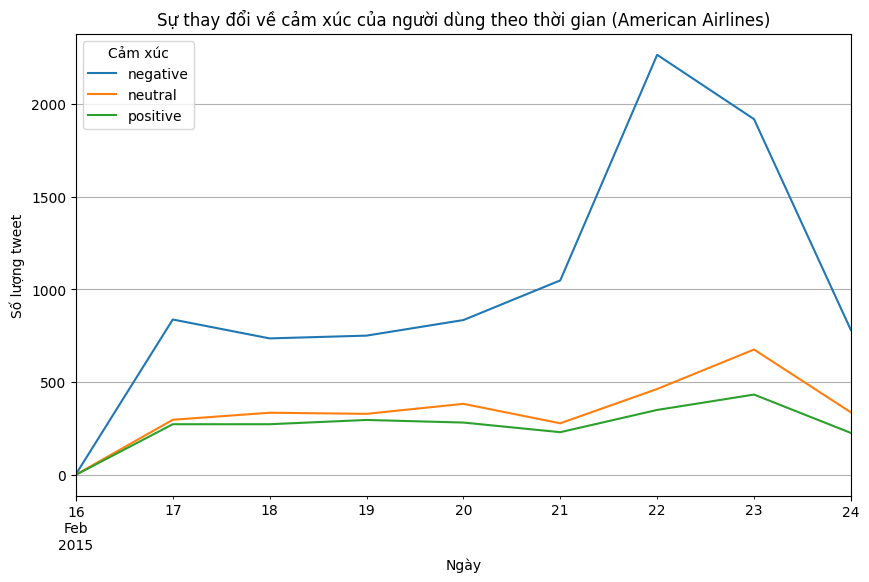

In [ ]:
# Chuyển cột 'tweet_created' sang kiểu dữ liệu datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Đặt cột 'tweet_created' làm cột chỉ mục
df.set_index('tweet_created', inplace=True)

# Tính toán số lượng tweet tích cực, tiêu cực và trung tính hàng ngày
daily_sentiment = df.resample('D')['airline_sentiment'].value_counts().unstack().fillna(0)

# Vẽ biểu đồ
daily_sentiment.plot(kind='line', figsize=(10, 6))
plt.title('Sự thay đổi về cảm xúc của người dùng theo thời gian (American Airlines)')
plt.xlabel('Ngày')
plt.ylabel('Số lượng tweet')
plt.legend(title='Cảm xúc')
plt.grid(True)
plt.show()

In [ ]:
# Chuyển cột 'tweet_created' sang kiểu dữ liệu datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Đặt cột 'tweet_created' làm cột chỉ mục
df.set_index('tweet_created', inplace=True)

# Lọc các tweet chỉ thuộc hãng American
american_df = df[df['airline'] == 'American']

# Tính toán số lượng tweet tích cực, tiêu cực và trung tính hàng ngày
daily_sentiment = american_df.resample('D')['airline_sentiment'].value_counts().unstack().fillna(0)

# In kết quả
print(daily_sentiment)

airline_sentiment          negative  neutral  positive
tweet_created                                         
2015-02-18 00:00:00-08:00       1.0      0.0       0.0
2015-02-19 00:00:00-08:00       0.0      0.0       1.0
2015-02-20 00:00:00-08:00       1.0      0.0       0.0
2015-02-21 00:00:00-08:00       1.0      0.0       0.0
2015-02-22 00:00:00-08:00     762.0    132.0      94.0
2015-02-23 00:00:00-08:00     826.0    178.0     137.0
2015-02-24 00:00:00-08:00     369.0    153.0     104.0


### 9. Các chủ đề phổ biến nào được đề cập trong các tweet về các hãng hàng không?

In [ ]:
from collections import Counter
import re

# Tạo một danh sách các stop words
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Tạo một danh sách các từ xuất hiện trong tất cả các tweet
all_words = ' '.join(df['text']).lower().split()

# Loại bỏ stop words và các ký tự đặc biệt không cần thiết
filtered_words = [word for word in all_words if word not in stop_words and re.match('^[a-zA-Z]+', word)]

# Tính toán tần suất xuất hiện của từng từ
word_counts = Counter(filtered_words)

# Lấy các từ xuất hiện nhiều nhất (ví dụ: top 10)
top_words = word_counts.most_common(10)

# In các từ xuất hiện nhiều nhất
for word, count in top_words:
    print(word, count)

air 5171
flight 3224
get 1329
cancelled 1047
customer 710
thanks 705
service 687
i'm 683
would 644
us 614


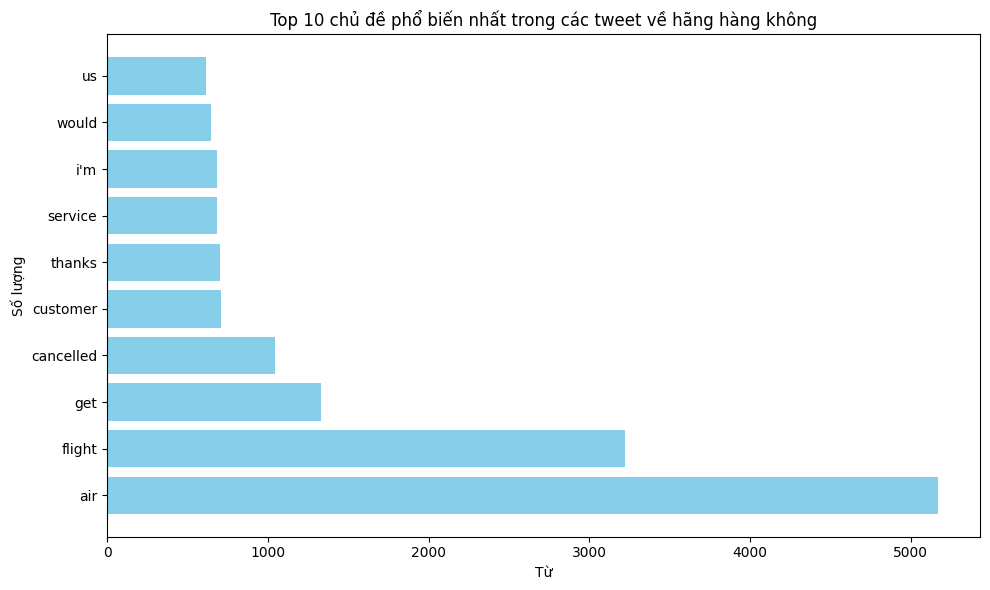

In [ ]:
# Lấy các từ và số lượng xuất hiện
words = [word for word, _ in top_words]
counts = [count for _, count in top_words]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Từ')
plt.ylabel('Số lượng')
plt.title('Top 10 chủ đề phổ biến nhất trong các tweet về hãng hàng không')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 10. Các cụm từ nào được nhắc đến nhiều nhất trong các bình luận?

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Khởi tạo CountVectorizer với cài đặt để xác định các cụm từ có tần suất xuất hiện cao
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')

# Fit và chuyển đổi văn bản thành ma trận đếm
X = vectorizer.fit_transform(df['text'])

# Tính tổng số lần xuất hiện của mỗi cụm từ
sum_words = X.sum(axis=0)

# Lấy danh sách các cụm từ và số lần xuất hiện của chúng
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sắp xếp danh sách theo số lần xuất hiện giảm dần
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# In ra top 10 cụm từ phổ biến nhất
top_phrases = words_freq[:10]
for phrase, count in top_phrases:
    print(f'"{phrase}": {count} lần')

"customer service": 562 lần
"cancelled flightled": 508 lần
"late flight": 249 lần
"cancelled flighted": 226 lần
"flight cancelled": 208 lần
"air flight": 198 lần
"air thanks": 194 lần
"late flightr": 157 lần
"fleet fleek": 146 lần
"booking problems": 145 lần


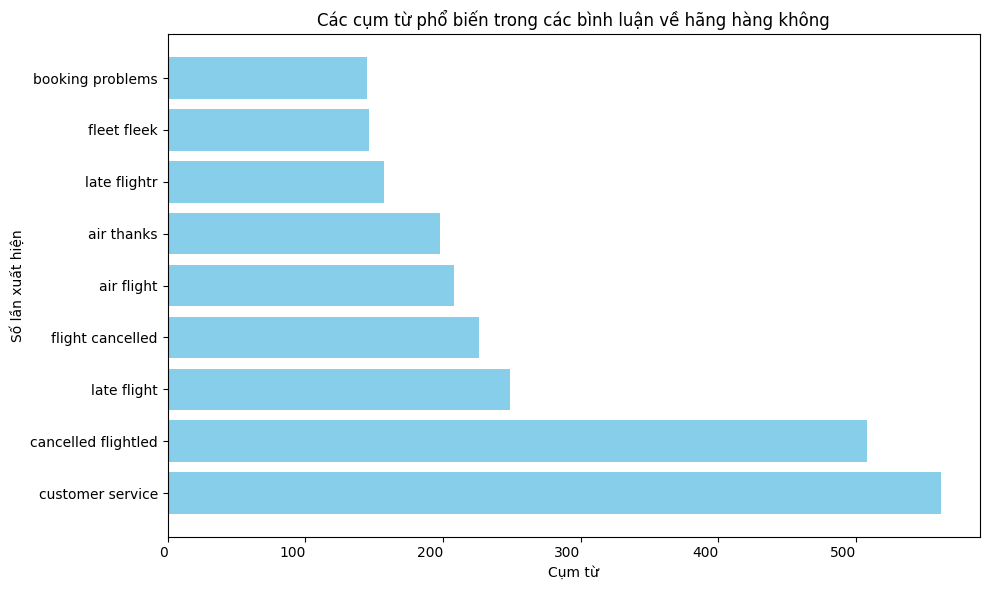

In [ ]:
# Tạo danh sách các cụm từ và số lần xuất hiện
phrases = ["customer service", "cancelled flightled", "late flight", "flight cancelled", "air flight", "air thanks", "late flightr", "fleet fleek", "booking problems"]
counts = [562, 508, 249, 226, 208, 198, 157, 146, 145]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(phrases, counts, color='skyblue')
plt.xlabel('Cụm từ')
plt.ylabel('Số lần xuất hiện')
plt.title('Các cụm từ phổ biến trong các bình luận về hãng hàng không')
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.show()

### 11. Các từ hoặc cụm từ nào thường xuất hiện trong các tweet tích cực về các hãng hàng không?

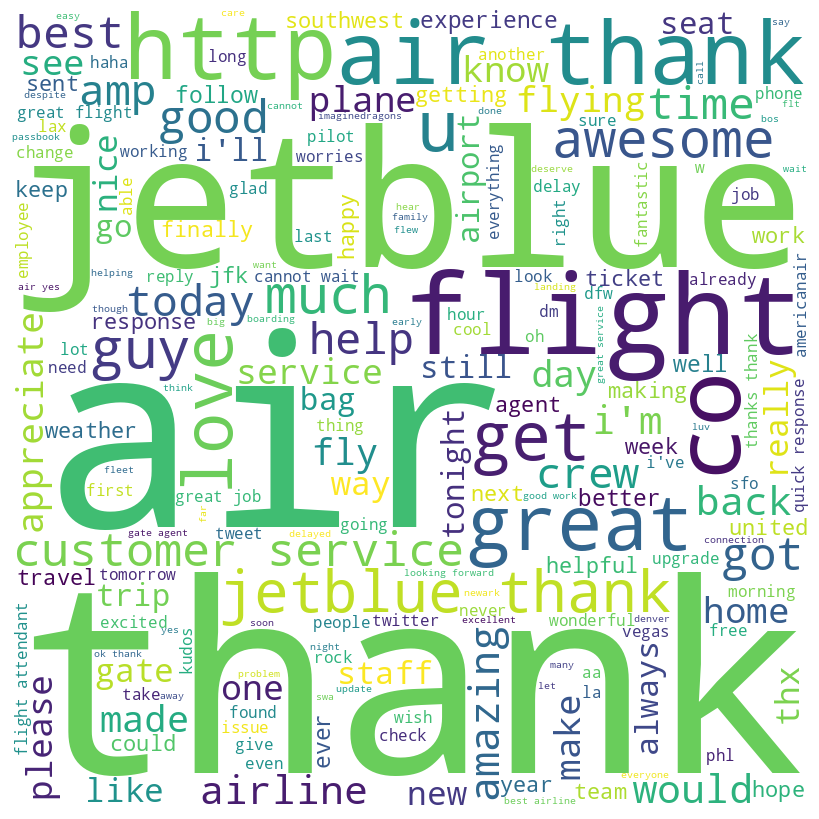

In [ ]:
# Lọc ra các tweet tích cực
positive_tweets = df[df['airline_sentiment'] == 'positive']['text']

# Tạo một string từ tất cả các tweet tích cực
positive_text = ' '.join(positive_tweets)

# Tạo một WordCloud để hiển thị các từ phổ biến trong các tweet tích cực
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Khởi tạo WordCloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stop_words,
                      min_font_size=10).generate(positive_text)

# Vẽ WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# In các từ xuất hiện nhiều nhất
top_positive_words = wordcloud.words_
print("Các từ xuất hiện nhiều nhất trong các tweet tích cực:")
for word, freq in top_positive_words.items():
    print(word, ":", freq)

### 12. Các từ hoặc cụm từ nào thường xuất hiện trong các tweet tiêu cực về các hãng hàng không?

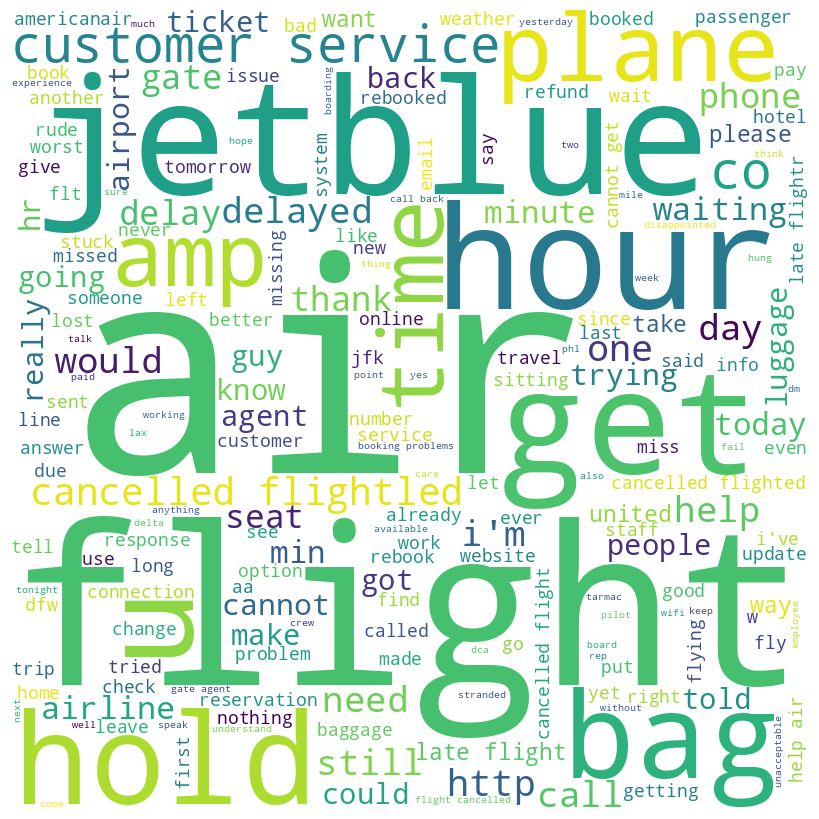

In [ ]:
# Lọc ra các tweet tiêu cực
negative_tweets = df[df['airline_sentiment'] == 'negative']['text']

# Tạo một string từ tất cả các tweet tiêu cực
negative_text = ' '.join(negative_tweets)

# Khởi tạo WordCloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(negative_text)

# Vẽ WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# In các từ xuất hiện nhiều nhất
top_negative_words = wordcloud.words_
print("Các từ xuất hiện nhiều nhất trong các tweet tiêu cực:")
for word, freq in top_negative_words.items():
    print(word, ":", freq)

### 13. Có sự thay đổi về cảm xúc của người dùng trong các tweet theo thời gian trong mỗi ngày của tuần không?

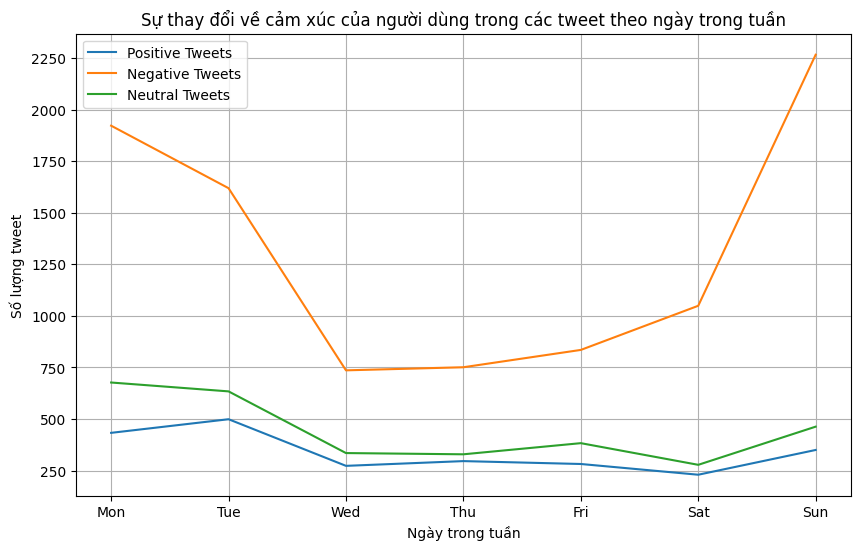

In [ ]:
# Chuyển cột 'thời_gian' sang kiểu datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Tạo cột mới cho giờ trong ngày và ngày trong tuần
df['ngày_trong_tuần'] = df['tweet_created'].dt.dayofweek  # Thứ Hai là 0, Thứ Ba là 1, ..., Chủ Nhật là 6

# Phân loại tweet theo cảm xúc (tùy thuộc vào cách bạn đã phân loại cảm xúc)
positive_tweets = df[df['airline_sentiment'] == 'positive']
negative_tweets = df[df['airline_sentiment'] == 'negative']
neutral_tweets = df[df['airline_sentiment'] == 'neutral']

# Tính số lượng tweet theo ngày trong tuần cho từng loại cảm xúc
positive_counts = positive_tweets.groupby('ngày_trong_tuần').size()
negative_counts = negative_tweets.groupby('ngày_trong_tuần').size()
neutral_counts = neutral_tweets.groupby('ngày_trong_tuần').size()

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))

positive_counts.plot(kind='line', label='Positive Tweets')
negative_counts.plot(kind='line', label='Negative Tweets')
neutral_counts.plot(kind='line', label='Neutral Tweets')

plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng tweet')
plt.title('Sự thay đổi về cảm xúc của người dùng trong các tweet theo ngày trong tuần')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Tính tổng số lượng tweet tích cực, tiêu cực và trung tính cho mỗi ngày trong tuần
positive_counts = positive_tweets.groupby('ngày_trong_tuần').size()
negative_counts = negative_tweets.groupby('ngày_trong_tuần').size()
neutral_counts = neutral_tweets.groupby('ngày_trong_tuần').size()

# Hiển thị kết quả
print("Số lượng tweet tích cực theo ngày trong tuần:")
print(positive_counts)
print("\nSố lượng tweet tiêu cực theo ngày trong tuần:")
print(negative_counts)
print("\nSố lượng tweet trung tính theo ngày trong tuần:")
print(neutral_counts)

Số lượng tweet tích cực theo ngày trong tuần:
ngày_trong_tuần
0    433
1    499
2    273
3    296
4    282
5    230
6    350
dtype: int64

Số lượng tweet tiêu cực theo ngày trong tuần:
ngày_trong_tuần
0    1922
1    1619
2     736
3     751
4     835
5    1049
6    2266
dtype: int64

Số lượng tweet trung tính theo ngày trong tuần:
ngày_trong_tuần
0    677
1    634
2    335
3    329
4    383
5    278
6    463
dtype: int64


### 14. Có mối liên hệ nào giữa độ dài của tweet và tính cảm của nó không?


In [ ]:
# Tính độ dài của mỗi tweet và thêm vào DataFrame
df['tweet_length'] = df['text'].apply(len)

# Phân loại tweet thành các nhóm dựa trên độ dài
short_tweets = df[df['tweet_length'] < 100]
medium_tweets = df[(df['tweet_length'] >= 100) & (df['tweet_length'] < 200)]
long_tweets = df[df['tweet_length'] >= 200]

# Tính toán tính cảm trung bình cho mỗi nhóm
positive_short_tweets = short_tweets[short_tweets['airline_sentiment'] == 'positive'].shape[0]
negative_short_tweets = short_tweets[short_tweets['airline_sentiment'] == 'negative'].shape[0]
neutral_short_tweets = short_tweets[short_tweets['airline_sentiment'] == 'neutral'].shape[0]

positive_medium_tweets = medium_tweets[medium_tweets['airline_sentiment'] == 'positive'].shape[0]
negative_medium_tweets = medium_tweets[medium_tweets['airline_sentiment'] == 'negative'].shape[0]
neutral_medium_tweets = medium_tweets[medium_tweets['airline_sentiment'] == 'neutral'].shape[0]

positive_long_tweets = long_tweets[long_tweets['airline_sentiment'] == 'positive'].shape[0]
negative_long_tweets = long_tweets[long_tweets['airline_sentiment'] == 'negative'].shape[0]
neutral_long_tweets = long_tweets[long_tweets['airline_sentiment'] == 'neutral'].shape[0]

# In kết quả
print("Số lượng tweet tích cực, tiêu cực và trung tính cho các nhóm tweet:")
print("Short Tweets (độ dài dưới 100 ký tự):")
print("Positive:", positive_short_tweets)
print("Negative:", negative_short_tweets)
print("Neutral:", neutral_short_tweets)
print()
print("Medium Tweets (độ dài từ 100 đến 200 ký tự):")
print("Positive:", positive_medium_tweets)
print("Negative:", negative_medium_tweets)
print("Neutral:", neutral_medium_tweets)
print()
print("Long Tweets (độ dài từ 200 ký tự trở lên):")
print("Positive:", positive_long_tweets)
print("Negative:", negative_long_tweets)
print("Neutral:", neutral_long_tweets)

Số lượng tweet tích cực, tiêu cực và trung tính cho các nhóm tweet:
Short Tweets (độ dài dưới 100 ký tự):
Positive: 1504
Negative: 3039
Neutral: 2008

Medium Tweets (độ dài từ 100 đến 200 ký tự):
Positive: 859
Negative: 6139
Neutral: 1091

Long Tweets (độ dài từ 200 ký tự trở lên):
Positive: 0
Negative: 0
Neutral: 0


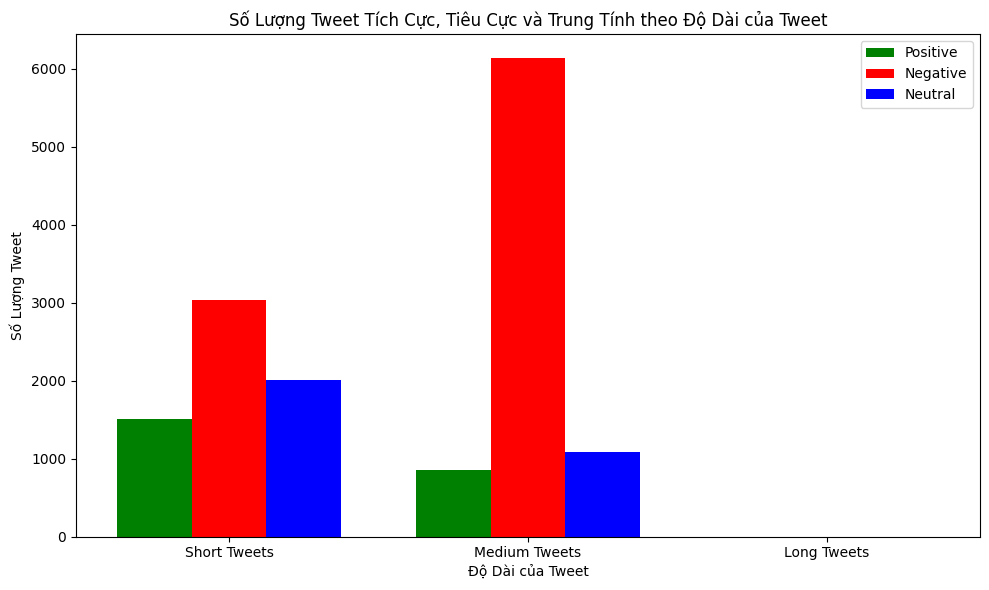

In [ ]:
categories = ['Short Tweets', 'Medium Tweets', 'Long Tweets']
positive_counts = [1504, 859, 0]
negative_counts = [3039, 6139, 0]
neutral_counts = [2008, 1091, 0]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(categories))

plt.bar(index, positive_counts, bar_width, label='Positive', color='green')
plt.bar([i + bar_width for i in index], negative_counts, bar_width, label='Negative', color='red')
plt.bar([i + bar_width*2 for i in index], neutral_counts, bar_width, label='Neutral', color='blue')

plt.xlabel('Độ Dài của Tweet')
plt.ylabel('Số Lượng Tweet')
plt.title('Số Lượng Tweet Tích Cực, Tiêu Cực và Trung Tính theo Độ Dài của Tweet')
plt.xticks([i + bar_width for i in index], categories)
plt.legend()

plt.tight_layout()
plt.show()

### 15. Có sự thay đổi về cách người dùng diễn đạt cảm xúc trong các tweet theo thời gian về hãng hàng không Virgin America hay không?

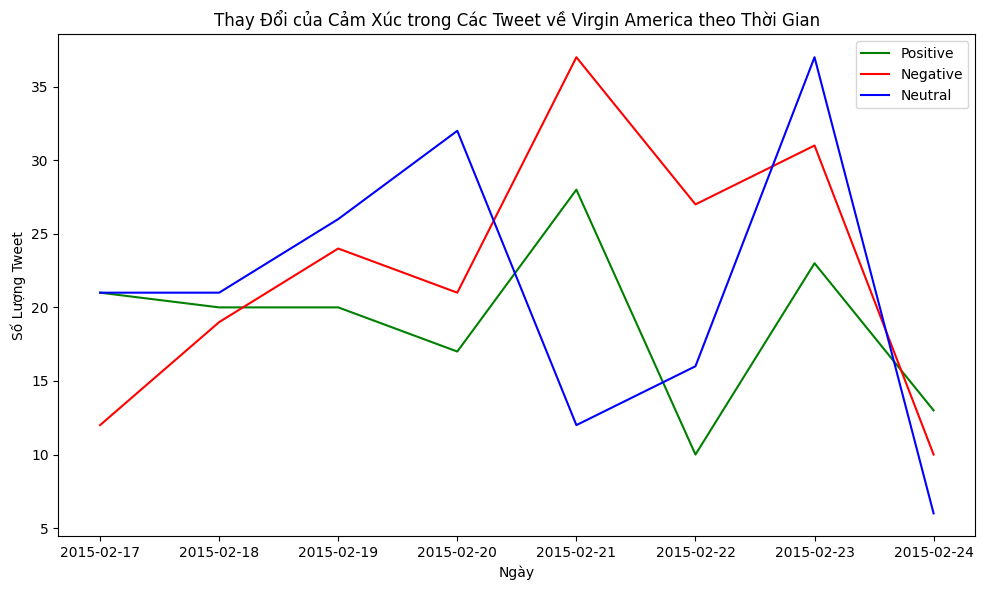

In [ ]:
# Lọc dữ liệu cho hãng hàng không Virgin America
virgin_america_tweets = df[df['airline'] == 'Virgin America']

# Chuyển cột 'tweet_created' sang kiểu datetime
virgin_america_tweets['tweet_created'] = pd.to_datetime(virgin_america_tweets['tweet_created'])

# Phân loại tweet theo ngày
virgin_america_tweets['ngày'] = virgin_america_tweets['tweet_created'].dt.date

# Phân loại tweet theo cảm xúc
positive_tweets = virgin_america_tweets[virgin_america_tweets['airline_sentiment'] == 'positive']
negative_tweets = virgin_america_tweets[virgin_america_tweets['airline_sentiment'] == 'negative']
neutral_tweets = virgin_america_tweets[virgin_america_tweets['airline_sentiment'] == 'neutral']

# Đếm số lượng tweet theo cảm xúc cho mỗi ngày
positive_counts = positive_tweets.groupby('ngày').size()
negative_counts = negative_tweets.groupby('ngày').size()
neutral_counts = neutral_tweets.groupby('ngày').size()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

plt.plot(positive_counts.index, positive_counts.values, label='Positive', color='green')
plt.plot(negative_counts.index, negative_counts.values, label='Negative', color='red')
plt.plot(neutral_counts.index, neutral_counts.values, label='Neutral', color='blue')

plt.xlabel('Ngày')
plt.ylabel('Số Lượng Tweet')
plt.title('Thay Đổi của Cảm Xúc trong Các Tweet về Virgin America theo Thời Gian')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Số lượng tweet tích cực theo ngày:")
print(positive_counts)
print("\nSố lượng tweet tiêu cực theo ngày:")
print(negative_counts)
print("\nSố lượng tweet trung tính theo ngày:")
print(neutral_counts)

### 16. Có sự thay đổi về cách người dùng diễn đạt cảm xúc trong các tweet theo thời gian về hãng hàng không United hay không?

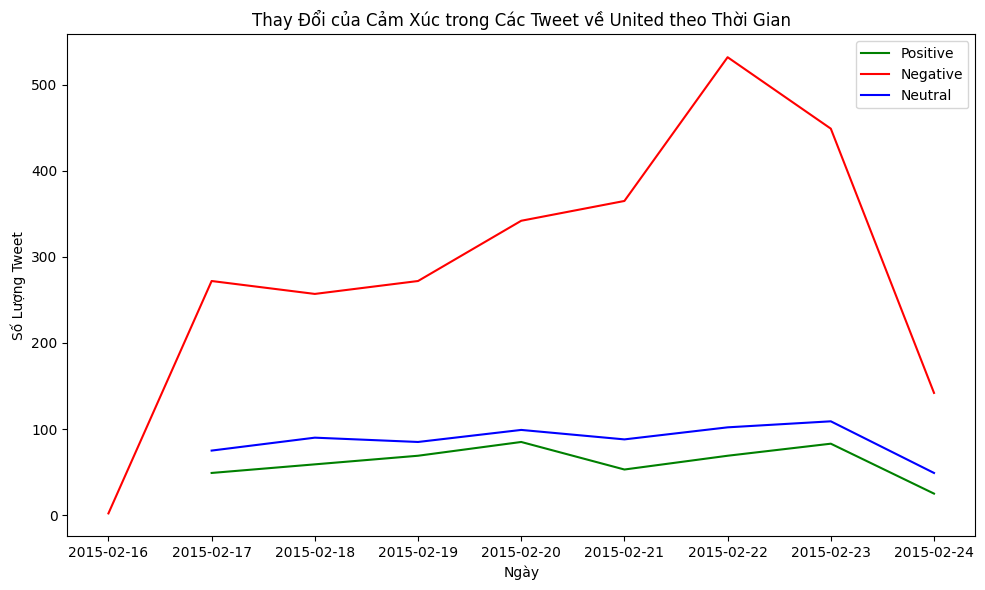

In [ ]:
# Lọc dữ liệu cho hãng hàng không Virgin America
virgin_america_tweets = df[df['airline'] == 'United']

# Chuyển cột 'tweet_created' sang kiểu datetime
virgin_america_tweets['tweet_created'] = pd.to_datetime(virgin_america_tweets['tweet_created'])

# Phân loại tweet theo ngày
virgin_america_tweets['ngày'] = virgin_america_tweets['tweet_created'].dt.date

# Phân loại tweet theo cảm xúc
positive_tweets = virgin_america_tweets[virgin_america_tweets['airline_sentiment'] == 'positive']
negative_tweets = virgin_america_tweets[virgin_america_tweets['airline_sentiment'] == 'negative']
neutral_tweets = virgin_america_tweets[virgin_america_tweets['airline_sentiment'] == 'neutral']

# Đếm số lượng tweet theo cảm xúc cho mỗi ngày
positive_counts = positive_tweets.groupby('ngày').size()
negative_counts = negative_tweets.groupby('ngày').size()
neutral_counts = neutral_tweets.groupby('ngày').size()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

plt.plot(positive_counts.index, positive_counts.values, label='Positive', color='green')
plt.plot(negative_counts.index, negative_counts.values, label='Negative', color='red')
plt.plot(neutral_counts.index, neutral_counts.values, label='Neutral', color='blue')

plt.xlabel('Ngày')
plt.ylabel('Số Lượng Tweet')
plt.title('Thay Đổi của Cảm Xúc trong Các Tweet về United theo Thời Gian')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print("Số lượng tweet tích cực theo ngày:")
print(positive_counts)
print("\nSố lượng tweet tiêu cực theo ngày:")
print(negative_counts)
print("\nSố lượng tweet trung tính theo ngày:")
print(neutral_counts)

Số lượng tweet tích cực theo ngày:
ngày
2015-02-17    49
2015-02-18    59
2015-02-19    69
2015-02-20    85
2015-02-21    53
2015-02-22    69
2015-02-23    83
2015-02-24    25
dtype: int64

Số lượng tweet tiêu cực theo ngày:
ngày
2015-02-16      2
2015-02-17    272
2015-02-18    257
2015-02-19    272
2015-02-20    342
2015-02-21    365
2015-02-22    532
2015-02-23    449
2015-02-24    142
dtype: int64

Số lượng tweet trung tính theo ngày:
ngày
2015-02-17     75
2015-02-18     90
2015-02-19     85
2015-02-20     99
2015-02-21     88
2015-02-22    102
2015-02-23    109
2015-02-24     49
dtype: int64


### 17. Tỷ lệ phần trăm tweet tích cực, tiêu cực và trung tính của mỗi hãng hàng không trong bộ dữ liệu?

In [ ]:
# Phân loại tweet theo hãng hàng không
airlines = df['airline'].unique()

# Khởi tạo DataFrame để lưu trữ kết quả
result_df = pd.DataFrame(columns=['Airline', 'Positive', 'Negative', 'Neutral'])

for airline in airlines:
    airline_tweets = df[df['airline'] == airline]
    total_tweets = len(airline_tweets)

    positive_tweets = len(airline_tweets[airline_tweets['airline_sentiment'] == 'positive'])
    negative_tweets = len(airline_tweets[airline_tweets['airline_sentiment'] == 'negative'])
    neutral_tweets = len(airline_tweets[airline_tweets['airline_sentiment'] == 'neutral'])

    positive_percentage = (positive_tweets / total_tweets) * 100
    negative_percentage = (negative_tweets / total_tweets) * 100
    neutral_percentage = (neutral_tweets / total_tweets) * 100

    result_df = result_df.append({'Airline': airline, 'Positive': positive_percentage, 'Negative': negative_percentage, 'Neutral': neutral_percentage}, ignore_index=True)

# In kết quả
print(result_df)

          Airline   Positive   Negative    Neutral
0  Virgin America  30.158730  35.912698  33.928571
1          United  12.872841  68.890633  18.236525
2       Southwest  23.553719  49.008264  27.438017
3           Delta  24.482448  42.979298  32.538254
4      US Airways   9.234466  77.686234  13.079300
5        American  12.178325  71.040232  16.781443


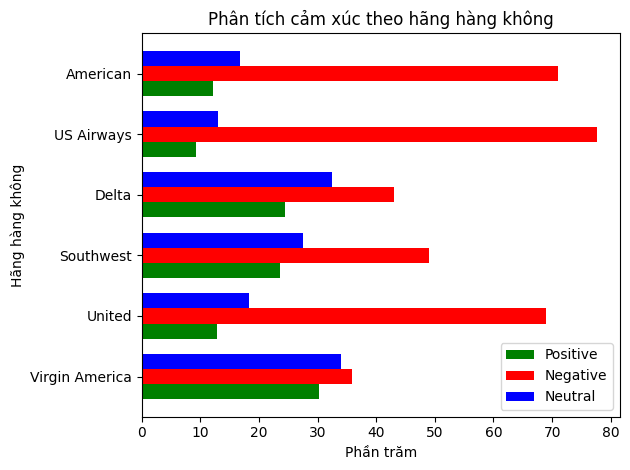

In [ ]:
hang_hang_khong = ['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']
phan_tram_tich_cuc = [30.16, 12.87, 23.55, 24.48, 9.23, 12.18]
phan_tram_tieu_cuc = [35.91, 68.89, 49.01, 42.98, 77.69, 71.04]
phan_tram_trung_tinh = [33.93, 18.24, 27.44, 32.54, 13.08, 16.78]

# Vẽ biểu đồ
chieu_rong_cot = 0.25
index = range(len(hang_hang_khong))

plt.barh(index, phan_tram_tich_cuc, chieu_rong_cot, label='Positive', color='g')
plt.barh([i + chieu_rong_cot for i in index], phan_tram_tieu_cuc, chieu_rong_cot, label='Negative', color='r')
plt.barh([i + 2 * chieu_rong_cot for i in index], phan_tram_trung_tinh, chieu_rong_cot, label='Neutral', color='b')

plt.ylabel('Hãng hàng không')
plt.xlabel('Phần trăm')
plt.title('Phân tích cảm xúc theo hãng hàng không')
plt.yticks([i + chieu_rong_cot for i in index], hang_hang_khong)
plt.legend()

plt.tight_layout()
plt.show()

### 18. Tần suất của các từ khóa như "Cancelled Flight", "Delayed", "Lost Luggage" có ảnh hưởng đến cảm xúc của tweet không?

In [ ]:
# Tạo cột mới để đánh dấu các tweet chứa từ khóa
df['contains_delay'] = df['text'].str.contains('flight canceled|delayed flight|lost luggage', case=False)

# Phân loại cảm xúc
positive_tweets = df[df['airline_sentiment'] == 'positive']
negative_tweets = df[df['airline_sentiment'] == 'negative']
neutral_tweets = df[df['airline_sentiment'] == 'neutral']

# Tính toán tần suất
frequency_positive = positive_tweets['contains_delay'].value_counts(normalize=True) * 100
frequency_negative = negative_tweets['contains_delay'].value_counts(normalize=True) * 100
frequency_neutral = neutral_tweets['contains_delay'].value_counts(normalize=True) * 100

print("Tần suất của từng từ khóa theo cảm xúc:")
print("Positive:")
print(frequency_positive)
print("\nNegative:")
print(frequency_negative)
print("\nNeutral:")
print(frequency_neutral)

Tần suất của từng từ khóa theo cảm xúc:
Positive:
False    99.957681
True      0.042319
Name: contains_delay, dtype: float64

Negative:
False    99.291785
True      0.708215
Name: contains_delay, dtype: float64

Neutral:
False    99.935463
True      0.064537
Name: contains_delay, dtype: float64


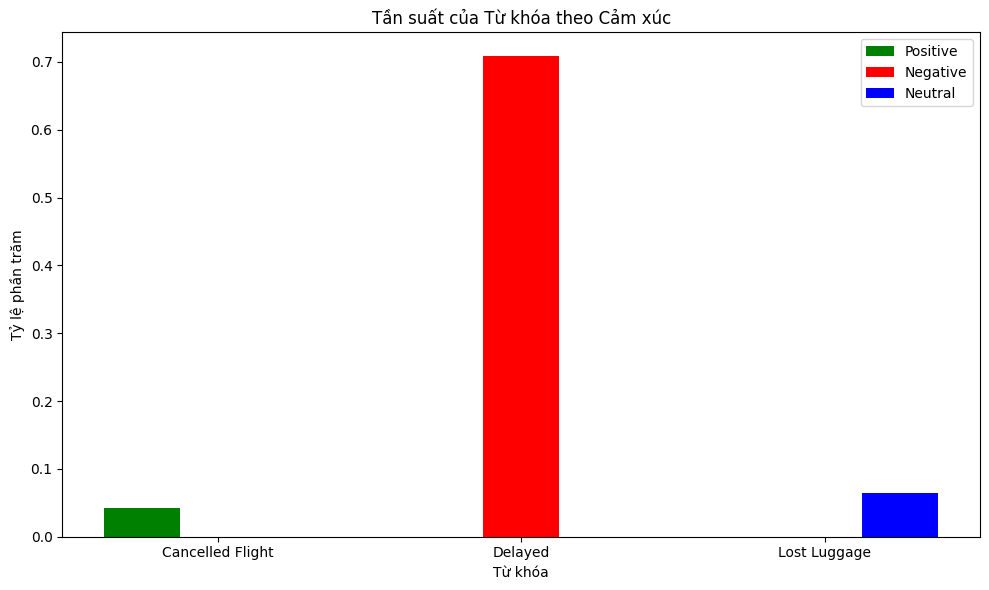

In [ ]:
# Tần suất của từng từ khóa theo cảm xúc
positive_freq = [0.042319, 0.0, 0.0]  # Positive
negative_freq = [0.0, 0.708215, 0.0]   # Negative
neutral_freq = [0.0, 0.0, 0.064537]    # Neutral

# Tên các từ khóa
keywords = ['Cancelled Flight', 'Delayed', 'Lost Luggage']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

bar_width = 0.25
index = range(len(keywords))

plt.bar(index, positive_freq, bar_width, color='green', label='Positive')
plt.bar([i + bar_width for i in index], negative_freq, bar_width, color='red', label='Negative')
plt.bar([i + bar_width*2 for i in index], neutral_freq, bar_width, color='blue', label='Neutral')

plt.xlabel('Từ khóa')
plt.ylabel('Tỷ lệ phần trăm')
plt.title('Tần suất của Từ khóa theo Cảm xúc')
plt.xticks([i + bar_width for i in index], keywords)
plt.legend()

plt.tight_layout()
plt.show()


### 19. Có mối liên hệ nào giữa việc sử dụng từ ngữ tích cực hoặc tiêu cực và cảm xúc của tweet không?

In [ ]:
# Từ khóa tích cực
positive_keywords = ['happy', 'joyful', 'great', 'excellent', 'wonderful', 'awesome', 'fantastic', 'amazing', 'love', 'best',
                     'beautiful', 'delightful', 'pleasure', 'satisfied', 'glad', 'excited', 'positive', 'fun', 'brilliant',
                     'superb', 'marvelous', 'exhilarating', 'grateful', 'joy', 'sensational', 'vibrant', 'pride', 'admire',
                     'wonder', 'win', 'celebrate', 'smile', 'satisfy', 'enjoy', 'delicious', 'sweet', 'fascinating', 'passionate',
                     'courageous', 'amusing', 'honor', 'cheer', 'impressed', 'blessed', 'hopeful', 'confident', 'bright', 'glorious',
                     'victory', 'accomplish', 'enthusiastic', 'content', 'excellent', 'upbeat', 'radiant', 'witty', 'beaming',
                     'friendly', 'charming', 'splendid', 'thankful', 'bliss', 'vitality', 'jubilant', 'graceful', 'affectionate',
                     'prosperous', 'lively', 'refreshing', 'optimistic', 'thrilling', 'harmony', 'happiness', 'ecstatic', 'energetic',
                     'peaceful', 'champion', 'delight', 'praise', 'colorful', 'sunny', 'fantasy', 'heartfelt', 'elated', 'triumph',
                     'eager', 'radiate', 'entertain', 'glow', 'success', 'fulfill', 'playful', 'sparkling', 'grin', 'genius']

# Từ khóa tiêu cực
negative_keywords = ['disappointed', 'angry', 'sad', 'terrible', 'horrible', 'awful', 'disgusting', 'displeased', 'hate', 'worst',
                     'bad', 'unhappy', 'angry', 'regret', 'mistake', 'upset', 'frustrated', 'negative', 'annoyed', 'stressful',
                     'irritated', 'offended', 'bored', 'dislike', 'furious', 'pain', 'miserable', 'painful', 'failure', 'depressed',
                     'threatened', 'lonely', 'fear', 'dreadful', 'broken', 'tragic', 'exhausted', 'worry', 'grim', 'insulted',
                     'disheartened', 'hopeless', 'cry', 'abuse', 'poor', 'sorrow', 'anger', 'guilt', 'grief', 'tired', 'angst',
                     'disappointing', 'discomfort', 'pessimistic', 'unfortunate', 'dismal', 'hurt', 'heartbroken', 'desperate',
                     'fail', 'misery', 'despair', 'jealous', 'suffer', 'betrayal', 'pain', 'agony', 'resentment', 'stress', 'bitter',
                     'annoying', 'trouble', 'fury', 'disaster', 'cry', 'tears', 'scream', 'struggle', 'loneliness', 'humiliation',
                     'melancholy', 'weak', 'displeasure', 'discouraged', 'exhausting', 'burden', 'desperation', 'trauma', 'disrupt',
                     'hateful', 'depressing', 'worried', 'regretful', 'suffering', 'distress', 'destruction', 'failure']

# Tạo cột mới cho từng nhóm cảm xúc
df['positive'] = df['text'].apply(lambda x: any(word in x.lower() for word in positive_keywords))
df['negative'] = df['text'].apply(lambda x: any(word in x.lower() for word in negative_keywords))

# Tính tỷ lệ phần trăm của từng nhóm cảm xúc
positive_percentage = (df['positive'].sum() / len(df)) * 100
negative_percentage = (df['negative'].sum() / len(df)) * 100

print("Tỷ lệ tweet tích cực:", positive_percentage, "%")
print("Tỷ lệ tweet tiêu cực:", negative_percentage, "%")

Tỷ lệ tweet tích cực: 15.191256830601093 %
Tỷ lệ tweet tiêu cực: 12.868852459016395 %


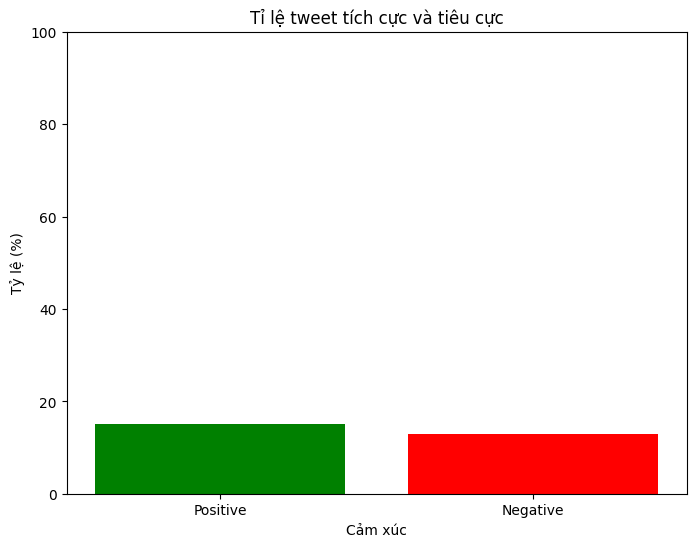

In [ ]:
sentiments = ['Positive', 'Negative']
percentages = [positive_percentage, negative_percentage]

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
plt.bar(sentiments, percentages, color=['green', 'red'])
plt.title('Tỉ lệ tweet tích cực và tiêu cực')
plt.xlabel('Cảm xúc')
plt.ylabel('Tỷ lệ (%)')
plt.ylim(0, 100)
plt.show()

### 20. Có sự chênh lệch về cảm xúc giữa các nhà cung cấp dịch vụ hàng không không?

In [ ]:
# Phân loại tweet theo từng nhà cung cấp dịch vụ hàng không
united_tweets = df[df['airline'] == 'United']
american_tweets = df[df['airline'] == 'American']
delta_tweets = df[df['airline'] == 'Delta']
virgin_tweets = df[df['airline'] == 'Virgin America']
southwest_tweets = df[df['airline'] == 'Southwest']
us_airways_tweets = df[df['airline'] == 'US Airways']

# Tính tỷ lệ phần trăm của từng loại cảm xúc trong mỗi nhóm
def calculate_sentiment_percentage(tweets):
    total_tweets = len(tweets)
    positive_percentage = (tweets['positive'].sum() / total_tweets) * 100
    negative_percentage = (tweets['negative'].sum() / total_tweets) * 100
    return positive_percentage, negative_percentage

united_sentiments = calculate_sentiment_percentage(united_tweets)
american_sentiments = calculate_sentiment_percentage(american_tweets)
delta_sentiments = calculate_sentiment_percentage(delta_tweets)
virgin_sentiments = calculate_sentiment_percentage(virgin_tweets)
southwest_sentiments = calculate_sentiment_percentage(southwest_tweets)
us_airways_sentiments = calculate_sentiment_percentage(us_airways_tweets)

# In kết quả
print("United Airlines:")
print("Positive:", united_sentiments[0], "%")
print("Negative:", united_sentiments[1], "%")
print("Neutral:", 100 - (united_sentiments[0] + united_sentiments[1]), "%")
print("\nAmerican Airlines:")
print("Positive:", american_sentiments[0], "%")
print("Negative:", american_sentiments[1], "%")
print("Neutral:", 100 - (american_sentiments[0] + american_sentiments[1]), "%")
print("\nDelta:")
print("Positive:", delta_sentiments[0], "%")
print("Negative:", delta_sentiments[1], "%")
print("Neutral:", 100 - (delta_sentiments[0] + delta_sentiments[1]), "%")
print("\nVirgin America:")
print("Positive:", virgin_sentiments[0], "%")
print("Negative:", virgin_sentiments[1], "%")
print("Neutral:", 100 - (virgin_sentiments[0] + virgin_sentiments[1]), "%")
print("\nSouthwest Airlines:")
print("Positive:", southwest_sentiments[0], "%")
print("Negative:", southwest_sentiments[1], "%")
print("Neutral:", 100 - (southwest_sentiments[0] + southwest_sentiments[1]), "%")
print("\nUS Airways:")
print("Positive:", us_airways_sentiments[0], "%")
print("Negative:", us_airways_sentiments[1], "%")
print("Neutral:", 100 - (us_airways_sentiments[0] + us_airways_sentiments[1]), "%")


United Airlines:
Positive: 13.89324960753532 %
Negative: 15.122972265829409 %
Neutral: 70.98377812663527 %

American Airlines:
Positive: 12.142080463936209 %
Negative: 13.3381660021747 %
Neutral: 74.51975353388909 %

Delta:
Positive: 17.64176417641764 %
Negative: 8.46084608460846 %
Neutral: 73.8973897389739 %

Virgin America:
Positive: 24.00793650793651 %
Negative: 8.333333333333332 %
Neutral: 67.65873015873015 %

Southwest Airlines:
Positive: 19.793388429752063 %
Negative: 9.669421487603305 %
Neutral: 70.53719008264463 %

US Airways:
Positive: 12.564366632337794 %
Negative: 16.27188465499485 %
Neutral: 71.16374871266736 %


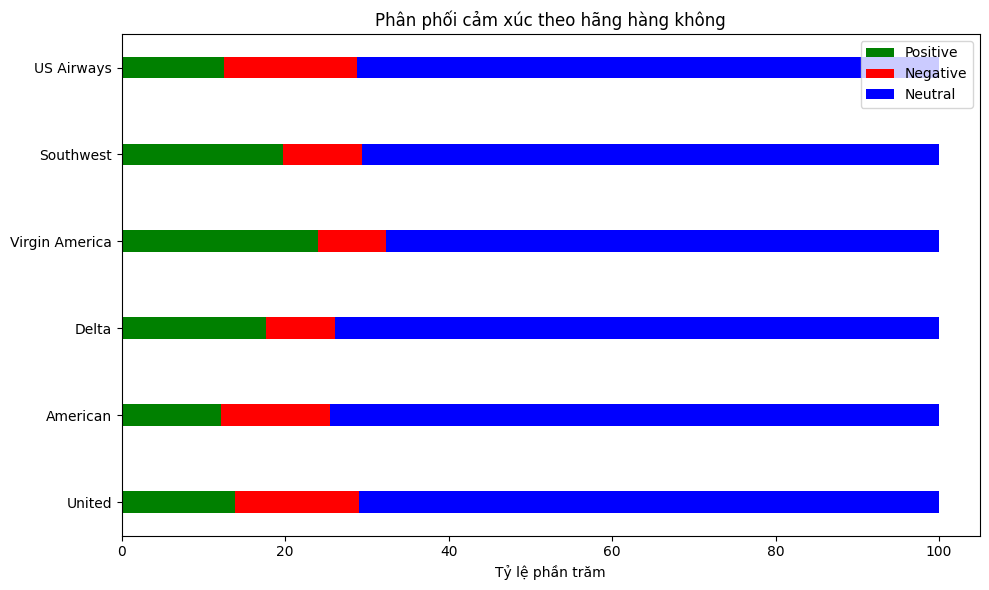

In [ ]:
airlines = ['United', 'American', 'Delta', 'Virgin America', 'Southwest', 'US Airways']
positive_percentages = [13.89, 12.14, 17.64, 24.01, 19.79, 12.56]
negative_percentages = [15.12, 13.34, 8.46, 8.33, 9.67, 16.27]
neutral_percentages = [70.98, 74.52, 73.90, 67.66, 70.54, 71.16]

# Vẽ biểu đồ
y = range(len(airlines))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(y, positive_percentages, width, label='Positive', color='green')
ax.barh(y, negative_percentages, width, left=positive_percentages, label='Negative', color='red')
ax.barh(y, neutral_percentages, width, left=[i+j for i,j in zip(positive_percentages, negative_percentages)], label='Neutral', color='blue')

ax.set_xlabel('Tỷ lệ phần trăm')
ax.set_title('Phân phối cảm xúc theo hãng hàng không')
ax.set_yticks(y)
ax.set_yticklabels(airlines)
ax.legend()

plt.tight_layout()
plt.show()